In [2]:
!pip install numpy scipy mne

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [4]:
# !ls -lh /content/S001.mat

-rw-r--r-- 1 root root 9.4M Nov  2 18:02 /content/S001.mat


In [5]:
mat = sio.loadmat("/content/S001.mat")
# print("Variables in file:", list(mat.keys()))
# data = mat["data"]
# print("Shape of 'data':", data.shape)

Variables in file: ['__header__', '__version__', '__globals__', 'data']
Shape of 'data': (8, 710, 2, 10, 12)


In [6]:
# Reorder axes: trials × channels × samples × freqs × sessions
EEG = np.transpose(data, (2, 0, 1, 3, 4))   # (2,8,710,10,12)

# Combine frequency & session dimensions into one long trial dimension
EEG = EEG.reshape(-1, 8, 710)
print("Reshaped EEG:", EEG.shape)

Reshaped EEG: (240, 8, 710)


In [8]:
freqs = np.array([9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75])
n_trials_per_freq = 2 * 12  # 2 trials × 12 sessions
labels = np.repeat(freqs, n_trials_per_freq)
print("Labels shape:", labels.shape)
print("Example labels:", labels[:20])
# each trial has an associated stimulus frequency

Labels shape: (240,)
Example labels: [9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25 9.25
 9.25 9.25 9.25 9.25 9.25 9.25]


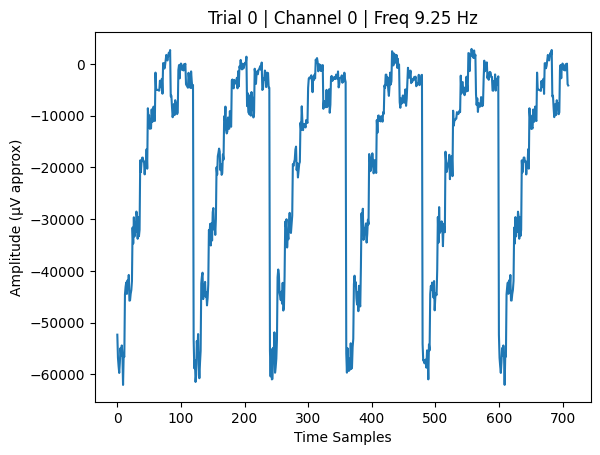

In [9]:
trial_idx = 0  # any number 0–239
ch_idx = 0     # first channel

plt.plot(EEG[trial_idx, ch_idx, :])
plt.title(f"Trial {trial_idx} | Channel {ch_idx} | Freq {labels[trial_idx]} Hz")
plt.xlabel("Time Samples")
plt.ylabel("Amplitude (µV approx)")
plt.show()

In [11]:
np.save("/content/S001_EEG.npy", EEG)
np.save("/content/S001_labels.npy", labels)

In [12]:
from google.colab import files
files.download("/content/S001_EEG.npy")
files.download("/content/S001_labels.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>